In [40]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

4.0


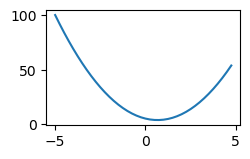

In [41]:
def f(x):
    return 3*x**2 - 4*x + 5
f(3.0)
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.figure(figsize=(5/2,3/2))
plt.plot(xs, ys)

h=0.00000001
x = 2/3
(f(x+h) - f(x))/h


a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

h = 0.0001

In [32]:
# start
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self._label = label
        
    def __repr__(self):
        return f"value(data={self.data})"
    
    def __add__(self, other): #called when we add two value objects
        out = Value(self.data + other.data, (self, other))
        self._op = '+'
        other._op = '+'
        return out
    
    def __mul__(self, other): #called when we add two value objects
        out = Value(self.data * other.data, (self, other))
        self._op = '*'
        other._op = '*'
        return out

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges



In [33]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b' )
c = Value(10.0, label = 'c')

e = a * b; e._label = 'e'
d = e + c; d._label = 'd'
f = Value(-2.0, label = 'f')
L = d * f; L._label = 'L'
# print(L)
nodes, edges = trace(L)
# print("nodes :",nodes)
# print("edges :",edges)

In [41]:
def print_tree(node,edges, level=0):
    prefix = node._label
    print(" " * (level * 10) + prefix + f" {('('+node._op +')') if node._op else '(root)'} ---> " + str(node.data))
    state = 0
    for n1, n2 in edges:
        if n2 == node:
            if not state:
                state += 1
                print_tree(n1,edges, level+1)
            else:
                print_tree(n1,edges, level+1)
print_tree(L,edges, 0)

L (root) ---> -8.0
          d (*) ---> 4.0
                    c (+) ---> 10.0
                    e (+) ---> -6.0
                              a (*) ---> 2.0
                              b (*) ---> -3.0
          f (*) ---> -2.0
